In [ ]:
# Imports
import fastf1
import matplotlib as mpl
import matplotlib.pyplot as plt
from fastf1 import plotting
from timple.timedelta import strftimedelta
from fastf1.core import Laps
import pandas as pd
import seaborn as sns

In [10]:
# GP picker
year = 2021 #GP year
gp = 'Abu Dhabi' # GP name
event = 'Q' # Q for qualifying, FP1 for free practice 1, R for race

In [11]:
# Configure matplotlib and f1 plots with this intit
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (6,6)
fastf1.Cache.enable_cache(r"/Users/Professor/Downloads/f1/cache")
fastf1.plotting.setup_mpl()
fastf1.plotting.setup_mpl(mpl_timedelta_support = True, color_scheme = 'fastf1', misc_mpl_mods = False)

In [13]:
session = fastf1.get_session(year, gp, event)
laps = session.load_laps(with_telemetry=True)
laps.dropna(subset=['Driver'], inplace = True)

core           INFO 	Loading laps for Abu Dhabi Grand Prix - Qualifying [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['47', '63', '3', '10', '99', '33', '31', '55', '9', '5', '18', '16', '11', '44', '22', '7', '14', '77', '4', '6']


ValueError: Cannot slice telemetry because self contains Laps of multiple drivers!

In [25]:
driver = 'VER'
tel_ver = laps[laps['Driver']==driver].pick_fastest().get_telemetry()
driver = 'HAM'
tel_ham = laps[laps['Driver']==driver].pick_fastest().get_telemetry()

Text(0.5, 1.0, 'Abu Dhabi Grand Prix 2021 \nQualifying, Gear shift')

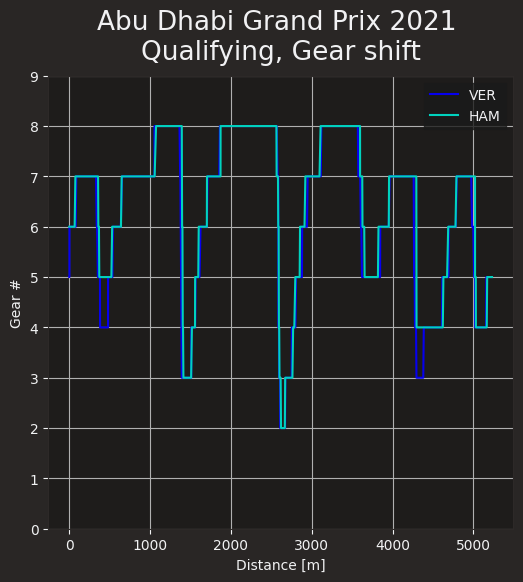

In [41]:
plt.plot(tel_ver['Distance'], tel_ver['nGear'], label='VER', color=fastf1.plotting.team_color('Red Bull'))
plt.plot(tel_ham['Distance'], tel_ham['nGear'], label='HAM', color=fastf1.plotting.team_color('Mercedes'))
plt.xlabel('Distance [m]')
plt.ylabel('Gear #')
plt.ylim(0, 9)
plt.grid()
plt.legend()
plt.title(f"{session.weekend.name} {session.weekend.year} \nQualifying, Gear shift")

Text(0.5, 1.0, 'Abu Dhabi Grand Prix 2021 \nQualifying, RPM')

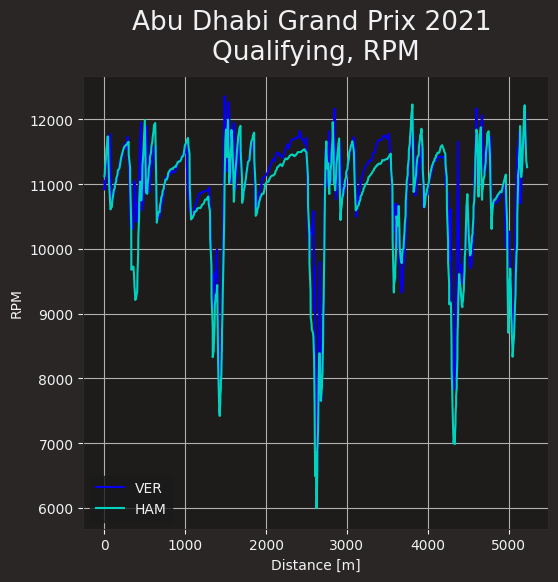

In [44]:
plt.plot(tel_ver['Distance'], tel_ver['RPM'], label='VER', color=fastf1.plotting.team_color('Red Bull'))
plt.plot(tel_ham['Distance'], tel_ham['RPM'], label='HAM', color=fastf1.plotting.team_color('Mercedes'))
plt.xlabel('Distance [m]')
plt.ylabel('RPM')
#plt.ylim(0, 9)
plt.grid()
plt.legend()
plt.title(f"{session.weekend.name} {session.weekend.year} \nQualifying, RPM")

In [42]:
tel_ham.columns

Index(['Date', 'SessionTime', 'DriverAhead', 'DistanceToDriverAhead', 'Time',
       'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source',
       'Distance', 'RelativeDistance', 'Status', 'X', 'Y', 'Z'],
      dtype='object')